<a href="https://colab.research.google.com/github/ldockx/my-first-data-engineering-project/blob/create-dataframe-from-strava-data/first_data_engineering_effort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
from datetime import datetime

# --- 1. Setup ---
API_KEY = "c726ffef4bc80d66ba1b86881e30dea3"  # get a free one at https://openweathermap.org/api
CITY = "Bruges"
URL = f"http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric"

# --- 2. Extract ---
response = requests.get(URL)
data = response.json()

#print(data)

# --- 3. Transform ---
# Flatten useful fields into a dict
weather_dict = {
    "city": data["name"],
    "temperature_C": data["main"]["temp"],
    "feels_like_C": data["main"]["feels_like"],
    "humidity_%": data["main"]["humidity"],
    "weather": data["weather"][0]["description"],
    "wind_speed_mps": data["wind"]["speed"],
    "timestamp": datetime.utcfromtimestamp(data["dt"])
}

# Convert to DataFrame for analysis
df = pd.DataFrame([weather_dict])

# --- 4. Load (for now, just display) ---
print(df)

# Optionally save to CSV
#df.to_csv("weather_data.csv", index=False)


     city  temperature_C  feels_like_C  humidity_%     weather  \
0  Bruges          13.93          13.6          85  light rain   

   wind_speed_mps           timestamp  
0           10.52 2025-10-04 07:05:06  


/tmp/ipython-input-2939271285.py:25: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  "timestamp": datetime.utcfromtimestamp(data["dt"])


In [ ]:
#forecast

import requests
import pandas as pd
from datetime import datetime

# --- Setup ---
API_KEY = "c726ffef4bc80d66ba1b86881e30dea3"   # Get free key from openweathermap.org
CITY = "Bruges"
URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

# --- Extract ---
response = requests.get(URL)
data = response.json()

# --- Transform ---
# Flatten forecast list into a table
forecast_list = []
for item in data["list"]:
    forecast_list.append({
        "city": data["city"]["name"],
        "datetime": datetime.utcfromtimestamp(item["dt"]),
        "temperature_C": item["main"]["temp"],
        "feels_like_C": item["main"]["feels_like"],
        "humidity_%": item["main"]["humidity"],
        "weather": item["weather"][0]["description"],
        "wind_speed_mps": item["wind"]["speed"]
    })

df = pd.DataFrame(forecast_list)

# --- Load ---
print(df.head())

# Save to CSV (acts as the "Load" step of ETL)
df.to_csv("weather_forecast.csv", index=False)


     city            datetime  temperature_C  feels_like_C  humidity_%  \
0  Bruges 2025-10-04 09:00:00          13.44         13.03          84   
1  Bruges 2025-10-04 12:00:00          15.51         14.84          66   
2  Bruges 2025-10-04 15:00:00          13.31         12.21          58   
3  Bruges 2025-10-04 18:00:00          12.98         12.11          68   
4  Bruges 2025-10-04 21:00:00          13.78         12.83          62   

      weather  wind_speed_mps  
0  light rain           12.08  
1  light rain           13.09  
2  light rain           14.03  
3  light rain           11.93  
4  light rain           11.40  


/tmp/ipython-input-4267610416.py:22: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  "datetime": datetime.utcfromtimestamp(item["dt"]),


Text(0, 0.5, 'Forecasted Temperature')

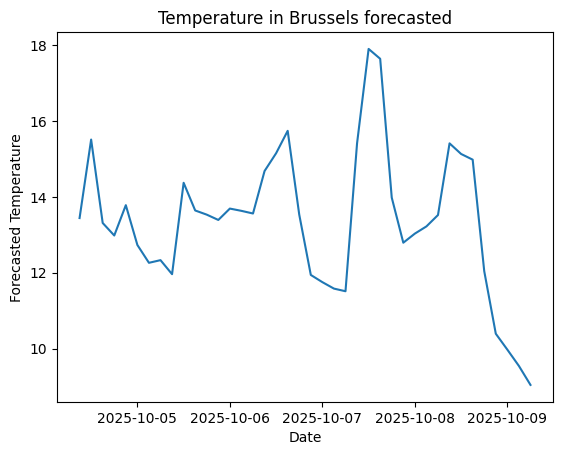

In [ ]:
import matplotlib.pyplot as plt

x = df["datetime"]
y = df["temperature_C"]
plt.plot(x,y)
plt.title("Temperature in Brussels forecasted")
plt.xlabel("Date")
plt.ylabel("Forecasted Temperature")

In [ ]:
!pip install stravalib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.5/305.5 kB 8.1 MB/s eta 0:00:00


In [ ]:
# Use webbrowser to launch a browser from Python
import webbrowser
import json
import stravalib

from stravalib.client import Client

client_id = "179478"
access_token = "860ce79dd00f6223f42b52af60c8c87fd7915a53"


client = Client()

# Read-only scope values
request_scope = ["read_all", "profile:read_all", "activity:read_all"]

# Create a localhost URL
redirect_url = "http://127.0.0.1:5000/authorization"
# Define a read-only scope
request_scope = ["read_all", "profile:read_all", "activity:read_all"]

# Create an authorization URL using stravalib
url = client.authorization_url(
    client_id=client_id,
    redirect_uri=redirect_url,
    scope=request_scope,
)

print(url)

# 'https://www.strava.com/oauth/authorize?client_id=123456&redirect_uri=http%3A%2F%2F127.0.0.1%3A5000%2Fauthorization&approval_prompt=auto&response_type=code&scope=read_all%2Cprofile%3Aread_all%2Cactivity%3Aread_all'

# Open the url that you created above in a web browser
webbrowser.open(url)
print(
    """You will see a URL that looks like this:
    http://127.0.0.1:5000/authorization?state=&code=12323423423423423423423550&scope=read,activity:read_all,profile:read_all,read_all
    Copy the values between code= and & in the URL that you see in the browser."""
)
# Using input allows you to copy the code into your Python console (or Jupyter Notebook)
code = input("Please enter the code that you received: ")

print(
    f"Great! Your code is {code}\n"
    "Next, I will exchange that code for a token.\n"
    "I only have to do this once."
)

https://www.strava.com/oauth/authorize?client_id=179478&redirect_uri=http%3A%2F%2F127.0.0.1%3A5000%2Fauthorization&approval_prompt=auto&scope=read_all%2Cprofile%3Aread_all%2Cactivity%3Aread_all&response_type=code
You will see a URL that looks like this:
    http://127.0.0.1:5000/authorization?state=&code=12323423423423423423423550&scope=read,activity:read_all,profile:read_all,read_all
    Copy the values between code= and & in the URL that you see in the browser.
Please enter the code that you received: 4ae16924adf1eabf0d8f5eff9d2ae516c2144b8a
Great! Your code is 4ae16924adf1eabf0d8f5eff9d2ae516c2144b8a
Next, I will exchange that code for a token.
I only have to do this once.


In [ ]:
client_secret = "22acdfc6850d9a81a189b4a42d9b4fa8fead0dfb"

token_response = client.exchange_code_for_token(
    client_id=client_id, client_secret=client_secret, code=code
)
print(token_response)

# Save the token response as a JSON file
#with open(json_path, "w") as f:
#    json.dump(token_response, f)

print("Token saved - hooray!")

# Access and refresh tokens
access_token = token_response["access_token"]
refresh_token = token_response["refresh_token"]  # Use this after 6 hours

{'access_token': 'eb0949ca74c02fe2e26569f0606a08248ea8b55c', 'refresh_token': '99ef40a0681db2d625f1e43531b91d6c516a6949', 'expires_at': 1759586032}
Token saved - hooray!


In [ ]:
# Open the token JSON file that you saved earlier
#with open(json_path, "r") as f:
#    token_response_refresh = json.load(f)

token_response_refresh = {'access_token': 'eb0949ca74c02fe2e26569f0606a08248ea8b55c', 'refresh_token': '99ef40a0681db2d625f1e43531b91d6c516a6949', 'expires_at': 1759586032}

print(token_response_refresh)

# Output:
# {'access_token': 'ab0667a99d17b7c278d9f730f733ad09016306cf',
# 'refresh_token':  '9f8d5689c93e83c7b0c69a8585010d4762e8b2ac',
#  'expires_at': 1726560054}

{'access_token': 'eb0949ca74c02fe2e26569f0606a08248ea8b55c', 'refresh_token': '99ef40a0681db2d625f1e43531b91d6c516a6949', 'expires_at': 1759586032}


In [ ]:
refresh_response = client.refresh_access_token(
    client_id=client_id,  # Stored in the secrets.txt file above
    client_secret=client_secret,
    refresh_token=refresh_token,  # Stored in your JSON file
)

# Check that the refresh worked
client.get_athlete()

# View the newly refreshed token
print(client.access_token)

eb0949ca74c02fe2e26569f0606a08248ea8b55c


access token = eb0949ca74c02fe2e26569f0606a08248ea8b55c


In [ ]:
import requests
import json
import time

# Replace with your credentials
CLIENT_ID = "YOUR_CLIENT_ID"
CLIENT_SECRET = "YOUR_CLIENT_SECRET"
REFRESH_TOKEN = "YOUR_REFRESH_TOKEN"

def get_access_token():
    """Refresh Strava access token using the refresh token."""
    auth_url = "https://www.strava.com/oauth/token"
    payload = {
        "client_id": CLIENT_ID,
        "client_secret": CLIENT_SECRET,
        "refresh_token": REFRESH_TOKEN,
        "grant_type": "refresh_token"
    }
    response = requests.post(auth_url, data=payload)
    response.raise_for_status()
    access_token = response.json()["access_token"]
    return access_token

def get_all_activities(access_token, per_page=200):
    """Retrieve *all* user activities, not just the first page."""
    activities = []
    page = 1
    while True:
        print(f"Fetching page {page}...")
        url = "https://www.strava.com/api/v3/athlete/activities"
        headers = {"Authorization": f"Bearer {access_token}"}
        params = {"per_page": per_page, "page": page}
        response = requests.get(url, headers=headers, params=params)

        if response.status_code != 200:
            print(f"Error {response.status_code}: {response.text}")
            break

        data = response.json()
        if not data:
            print("No more activities found — all data retrieved.")
            break

        activities.extend(data)
        page += 1
        time.sleep(0.2)  # be gentle to Strava's API limits

    return activities

if __name__ == "__main__":
    token = get_access_token()
    activities = get_all_activities(token)

    print(f"\n✅ Retrieved {len(activities)} total activities.")
    # Optionally save to file
    with open("strava_activities.json", "w") as f:
        json.dump(activities, f, indent=2)


In [46]:
import requests
import json
import pandas as pd
import time

# Replace these with your own Strava API credentials
CLIENT_ID = "179478" #client_id #
CLIENT_SECRET = "22acdfc6850d9a81a189b4a42d9b4fa8fead0dfb" #client_secret
REFRESH_TOKEN = "99ef40a0681db2d625f1e43531b91d6c516a6949" #refresh_token

# Step 1: Get a new access token using your refresh token
def get_access_token():
    auth_url = "https://www.strava.com/oauth/token"
    payload = {
        "client_id": CLIENT_ID,
        "client_secret": CLIENT_SECRET,
        "refresh_token": REFRESH_TOKEN,
        "grant_type": "refresh_token"
    }
    response = requests.post(auth_url, data=payload)
    response.raise_for_status()
    access_token = response.json()["access_token"]
    return access_token

# Step 2: Get activities using the access token
#def get_activities(access_token, per_page=500, page=1):
#    activities_url = "https://www.strava.com/api/v3/athlete/activities"
#    headers = {"Authorization": f"Bearer {access_token}"}
#    params = {"per_page": per_page, "page": page}
#    response = requests.get(activities_url, headers=headers, params=params)
#    response.raise_for_status()
#    return response.json()

def get_all_activities(access_token, per_page=200):
    """Retrieve *all* user activities, not just the first page."""
    activities = []
    page = 1
    while True:
        print(f"Fetching page {page}...")
        url = "https://www.strava.com/api/v3/athlete/activities"
        headers = {"Authorization": f"Bearer {access_token}"}
        params = {"per_page": per_page, "page": page}
        response = requests.get(url, headers=headers, params=params)

        if response.status_code != 200:
            print(f"Error {response.status_code}: {response.text}")
            break

        data = response.json()
        if not data:
            print("No more activities found — all data retrieved.")
            break

        activities.extend(data)
        page += 1
        time.sleep(0.2)  # be gentle to Strava's API limits

    return activities

if __name__ == "__main__":
    token = get_access_token()
    activities = get_all_activities(token)#, per_page=200, page=1)

    # Print activities in readable format
    #print(json.dumps(activities, indent=2))
    data = pd.read_json(json.dumps(activities, indent=2))


Fetching page 1...
Fetching page 2...
Fetching page 3...
No more activities found — all data retrieved.


/tmp/ipython-input-384037552.py:66: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_json(json.dumps(activities, indent=2))


In [55]:
data.head(10)

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,has_kudoed,average_cadence,average_watts,max_watts,weighted_average_watts,device_watts,kilojoules,Day,Month,Year
0,2,"{'id': 54565248, 'resource_state': 1}",Middagtraining,0.0,3784,3784,0.0,Workout,Workout,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,4,10,2025
1,2,"{'id': 54565248, 'resource_state': 1}",Avondloop,8069.6,2371,2371,4.0,Run,Run,NaN,...,False,86.6,422.9,580.0,422.0,1.0,1002.1,1,10,2025
2,2,"{'id': 54565248, 'resource_state': 1}",Middagloop,30008.0,10392,11110,49.0,Run,Run,NaN,...,False,85.4,356.1,529.0,349.0,1.0,3696.0,28,9,2025
3,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,6017.3,2016,2094,7.0,Run,Run,NaN,...,False,83.0,363.2,702.0,405.0,1.0,717.5,22,9,2025
4,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,16590.7,5590,5654,17.0,Run,Run,NaN,...,False,84.2,371.7,479.0,371.0,1.0,2078.8,19,9,2025
5,2,"{'id': 54565248, 'resource_state': 1}",Avondloop,8510.4,3027,3192,64.0,Run,Run,NaN,...,False,82.9,352.0,619.0,348.0,1.0,1066.8,17,9,2025
6,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,25031.2,8175,8187,26.0,Run,Run,NaN,...,False,84.1,387.9,539.0,389.0,1.0,3171.4,12,9,2025
7,2,"{'id': 54565248, 'resource_state': 1}",Avondintervallen,7015.7,2243,2243,5.0,Run,Run,NaN,...,False,82.4,385.5,672.0,416.0,1.0,862.2,10,9,2025
8,2,"{'id': 54565248, 'resource_state': 1}",Ochtendloop,5290.1,1701,1701,27.0,Run,Run,NaN,...,False,84.9,387.8,544.0,389.0,1.0,659.6,8,9,2025
9,2,"{'id': 54565248, 'resource_state': 1}",Ochtendhike,20732.2,20135,22871,1147.0,Hike,Hike,NaN,...,False,54.4,NaN,NaN,NaN,NaN,NaN,7,9,2025


In [48]:
# 1️⃣ Convert start_date to datetime
data["start_date"] = pd.to_datetime(data["start_date"])

#add date columns
data["Day"] = data["start_date"].dt.day
data["Month"] = data["start_date"].dt.month
data["Year"] = data["start_date"].dt.year

In [52]:
data

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,has_kudoed,average_cadence,average_watts,max_watts,weighted_average_watts,device_watts,kilojoules,Day,Month,Year
0,2,"{'id': 54565248, 'resource_state': 1}",Middagtraining,0.0,3784,3784,0.0,Workout,Workout,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,4,10,2025
1,2,"{'id': 54565248, 'resource_state': 1}",Avondloop,8069.6,2371,2371,4.0,Run,Run,NaN,...,False,86.6,422.9,580.0,422.0,1.0,1002.1,1,10,2025
2,2,"{'id': 54565248, 'resource_state': 1}",Middagloop,30008.0,10392,11110,49.0,Run,Run,NaN,...,False,85.4,356.1,529.0,349.0,1.0,3696.0,28,9,2025
3,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,6017.3,2016,2094,7.0,Run,Run,NaN,...,False,83.0,363.2,702.0,405.0,1.0,717.5,22,9,2025
4,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,16590.7,5590,5654,17.0,Run,Run,NaN,...,False,84.2,371.7,479.0,371.0,1.0,2078.8,19,9,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2,"{'id': 54565248, 'resource_state': 1}",Avondloop,7013.9,2112,2115,57.4,Run,Run,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,7,4,2023
281,2,"{'id': 54565248, 'resource_state': 1}",Namiddagzwemsessie,2000.0,2977,2977,0.0,Swim,Swim,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,6,4,2023
282,2,"{'id': 54565248, 'resource_state': 1}",Namiddagzwemsessie,1400.0,2341,2341,0.0,Swim,Swim,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,5,4,2023
283,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,6837.9,2240,2253,29.8,Run,Run,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,22,3,2023


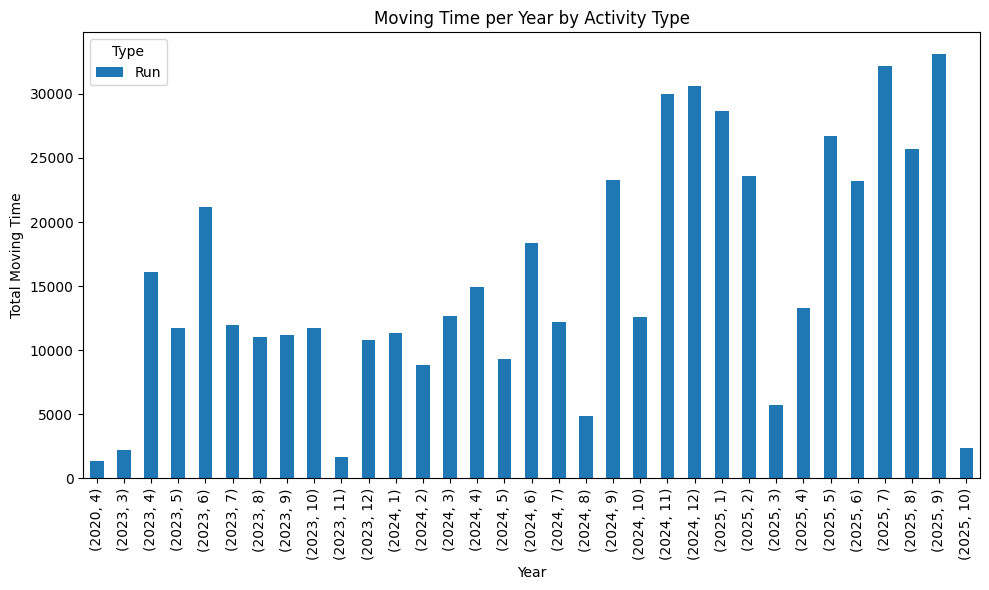

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Example assumes your DataFrame has at least these columns:
# 'Month', 'distance', and 'type'

# 1️⃣ Group data by Month and Type, summing distance
grouped = data[data["type"] == "Run"].groupby(["Year", "Month", "type"])["moving_time"].sum().unstack(fill_value=0)

# 2️⃣ Plot stacked bar chart
grouped.plot(kind="bar", stacked=True, figsize=(10,6))

# 3️⃣ Customize chart
plt.title("Moving Time per Year by Activity Type")
plt.xlabel("Year")
plt.ylabel("Total Moving Time")
plt.legend(title="Type")
plt.tight_layout()
plt.show()
